# Low-Rank Approximation

In this section, you will be asked to investigated how the trade-off between
the selected ranks of SVD and its performance in terms of reconstruction
accuracy and speed-up (in clock-time and in FLOPS).

## 1. Set-up

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

In [3]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = handle
BRANCH = "main"

# %mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull
%cd /content/gdrive/MyDrive/ece5545

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-MaximClouser' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-MaximClouser
Already on 'main'
Your branch is up to date with 'origin/main'.
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5 (delta 3), reused 5 (delta 3), pack-reused 0
Unpacking objects: 100% (5/5), 603 bytes | 1024 bytes/s, done.
From https://github.com/ML-HW-SYS/a4-MaximClouser
   dbfc7cb..36d4a4c  main       -> origin/main
Updating dbfc7cb..36d4a4c
Fast-forward
 mnist.py | 13 ++++++++-----
 1 file changed, 8 insertions(+), 5 deletions(-)
/content/gdrive/MyDrive/ece5545


In [4]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

Verify the following cell prints your github repository.

In [5]:
!ls {PROJECT_ROOT}


1-numerical_precision.ipynb  2-svd_rank.ipynb  3_MNIST.ipynb  data  mnist.py  README.md  src  tests


In [6]:
# Install required packgaes
!pip install torch numpy matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

# 2. Rank v.s. Reconstruction Error

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the reconstruction error of the matrix (in the y-axis, measured by the Frobenius Norm).

NOTE: you can use `svd(A, torch.eye(A.shape(2), rank_A=<rank>, rank_B=None)` to do SVD, drop the rank
to `<rank>`, and return the reconstruction matrix of `A`.

We will provide a series of matrix for you to study. Please make one plot per matrix.
For each plot, comment on the trade-off between the number of ranks selected and the error by answering
the following questions:
1. Is the reconstruction error increasing or decreasing as we add more rank?
2. How fast is the reconstruction error change as we add more rank? Is it changing quickly or slowly? Why?
3. Is there a rank number below/above which the reconstruction error increase significantly?
4. What can you learn about this data?

In [7]:
%cd a4-MaximClouser

/content/gdrive/MyDrive/ece5545/a4-MaximClouser


In [8]:
from numpy.linalg import norm
import time
import matplotlib.pyplot as plt

In [9]:
def plot_error(errors, ranks, name):
  plt.figure(figsize=(14, 6))
  plt.subplot(1, 2, 1)
  plt.plot(errors, ranks, marker='o')
  plt.title(f'{name} Reconstruction Error vs Rank')
  plt.xlabel('Rank Preserved')
  # plt.xscale('log', base=2)
  plt.ylabel('Reconstruction Error')
  plt.tight_layout()
  plt.show()

[43.508526, 6.2953105, 0.0021615033] [1, 2, 3]


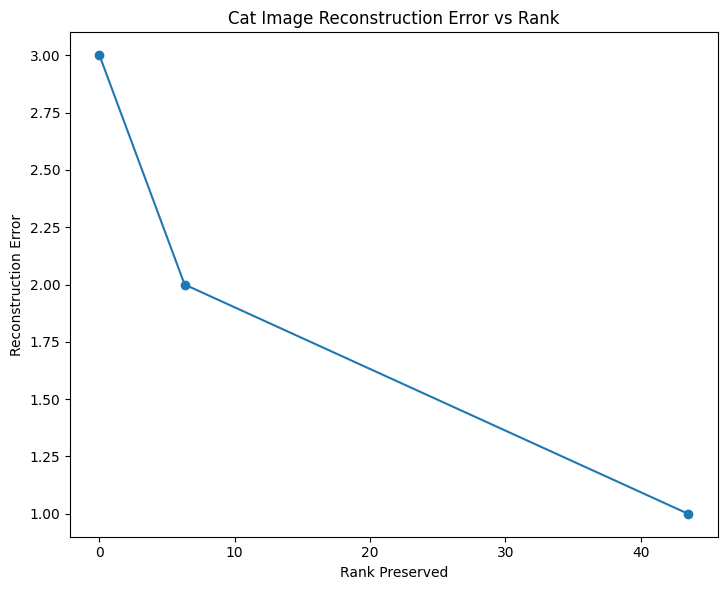

In [10]:
from src.matmul import svd
from src.matmul import matmul
import torch
import matplotlib.image
# Pixels of a cute cat
A = torch.from_numpy(matplotlib.image.imread("data/cat.png")).view(-1, 3)

ranks = list(range(1, min(A.size(0), A.size(1)) + 1))
errors = []
for rank in ranks:
      B = torch.eye(A.size(1))
      out = svd(A, B, rank_A=rank, rank_B=None)
      error = norm((A - out).numpy(), 'fro')
      errors.append(error)
print(errors, ranks)
plot_error(errors, ranks, "Cat Image")

[524.57666, 135.4149, 67.946526, 31.50039, 9.8034525, 0.40786383] [1, 101, 201, 301, 401, 501]


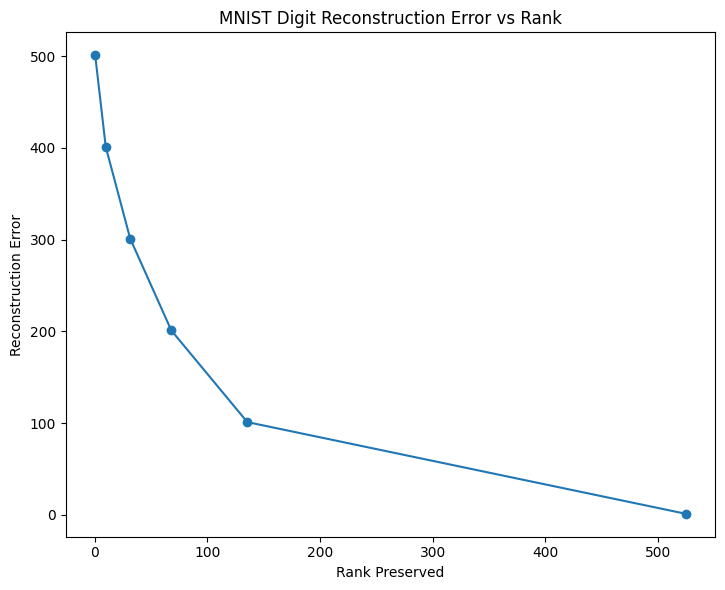

In [11]:
# A batch of MNIST digit
import torch
A = torch.load("data/mnist_act.pt")['act.0']

ranks = list(range(1, min(A.size(0), A.size(1)) + 1, 100))
errors = []
for rank in ranks:
      B = torch.eye(A.size(1))
      out = svd(A, B, rank_A=rank, rank_B=None)
      error = norm((A - out).numpy(), 'fro')
      errors.append(error)
print(errors, ranks)
plot_error(errors, ranks, "MNIST Digit")

[510.83487, 351.41458, 226.0741, 124.29772, 46.881954, 1.4273924] [1, 101, 201, 301, 401, 501]


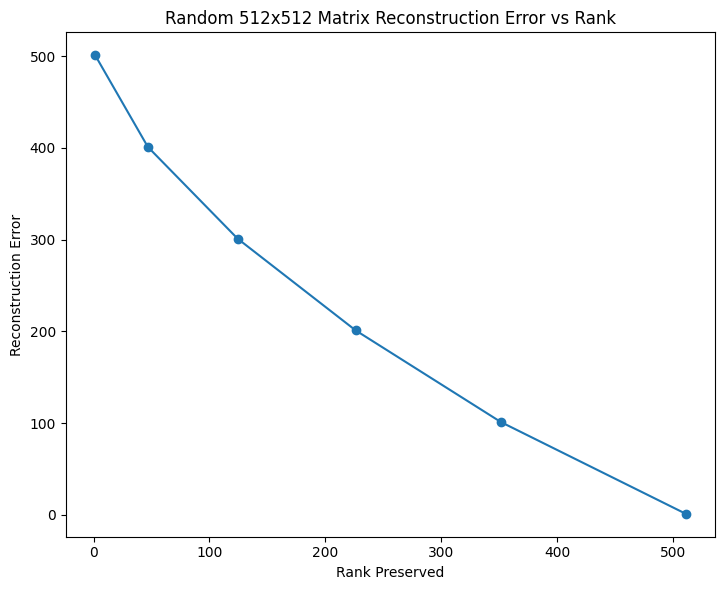

In [12]:
import torch
# A random matrix
A = torch.randn(512, 512)

ranks = list(range(1, min(A.size(0), A.size(1)) + 1, 100))
errors = []
for rank in ranks:
      B = torch.eye(A.size(1))
      out = svd(A, B, rank_A=rank, rank_B=None)
      error = norm((A - out).numpy(), 'fro')
      errors.append(error)
print(errors, ranks)
plot_error(errors, ranks, "Random 512x512 Matrix")

[491.982, 131.53114, 67.31867, 31.784143, 10.298361, 0.21777405] [1, 101, 201, 301, 401, 501]


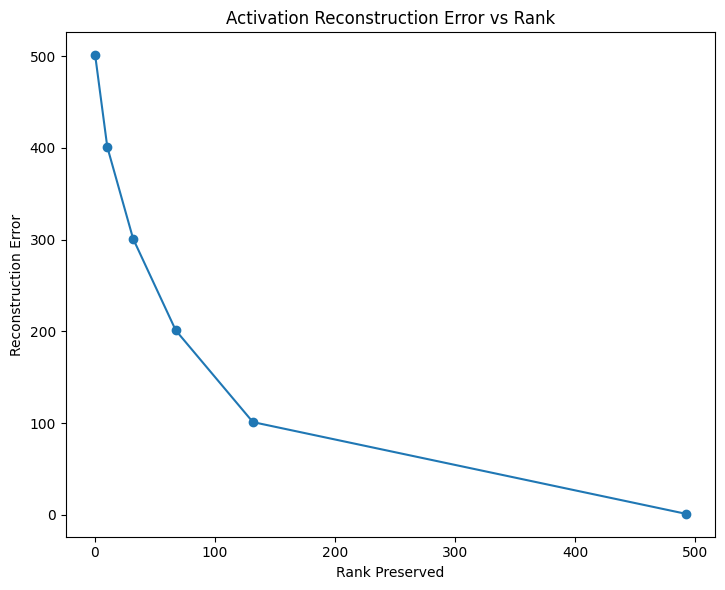

In [13]:
import torch
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

ranks = list(range(1, min(A.size(0), A.size(1)) + 1, 100))
errors = []
for rank in ranks:
      B = torch.eye(A.size(1))
      out = svd(A, B, rank_A=rank, rank_B=None)
      error = norm((A - out).numpy(), 'fro')
      errors.append(error)
print(errors, ranks)
plot_error(errors, ranks, "Activation")

[11.7076435, 6.230106, 4.7573, 3.461154, 2.176419, 0.480261] [1, 26, 51, 76, 101, 126]


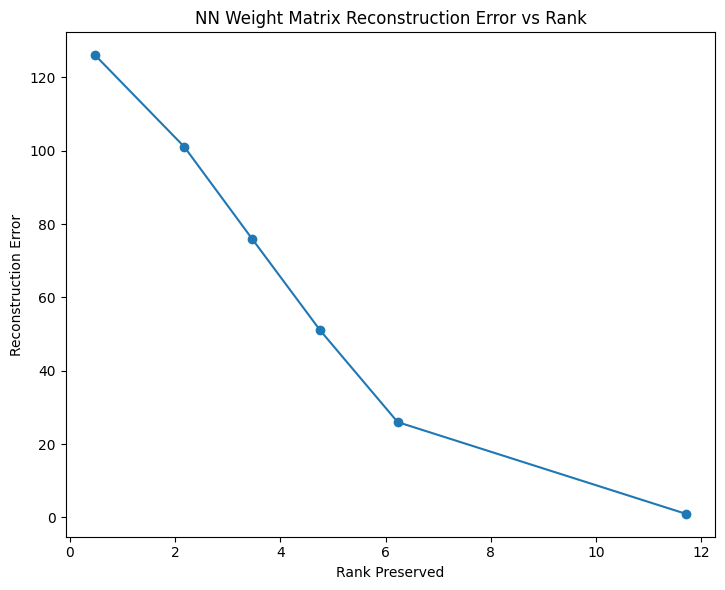

In [14]:
import torch
# Weight matrix of a fully connected neural network (trained on MNIST)
A = torch.load("data/mnist_fc.pt")['fc2.weight']

ranks = list(range(1, min(A.size(0), A.size(1)) + 1, 25))
errors = []
for rank in ranks:
      B = torch.eye(A.size(1))
      out = svd(A, B, rank_A=rank, rank_B=None)
      error = norm((A - out).numpy(), 'fro')
      errors.append(error)
print(errors, ranks)
plot_error(errors, ranks, "NN Weight Matrix")

# 2. Rank v.s. Speed up

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the speed up of matrix-matrix multiply (in the y-axis, measured by both FLOPs and clock time)

You can assume both matrix A and B are using the same number of rank when approximating.

In [41]:
import timeit
import torch.autograd.profiler as profiler
# def measure_multiplication(A, B, rank, num_runs=10):
#     total_elapsed_time = 0
#     for _ in range(num_runs):
#         start_time = timeit.default_timer()
#         C = svd(A, B, rank, rank)
#         elapsed_time = timeit.default_timer() - start_time
#         total_elapsed_time += elapsed_time
#     average_elapsed_time = total_elapsed_time / num_runs
#     flops = 4 * A.size(0) * rank * A.size(1)
#     return average_elapsed_time, flops

def measure_multiplication(A, B, rank, num_runs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    A = A.to(device)
    B = B.to(device)
    if device.type == 'cuda':
        for _ in range(10):
            _ = svd(A, B, rank, rank)
    with profiler.profile(use_cuda=True, record_shapes=True) as prof:
        for _ in range(num_runs):
            C = svd(A, B, rank, rank)
    cuda_time = sum([item.cuda_time_total for item in prof.key_averages()]) / num_runs / 1000  # ms
    if rank is None:
        rank = A.size(1)
    flops = 4 * A.size(0) * rank * A.size(1)
    return cuda_time, flops

In [45]:
import torch
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

# Weight matrix of a fully connected neural network (trained on MNIST)
B = torch.load("data/mnist_fc.pt")['fc2.weight'].transpose(0, 1)

original_runtime, original_flops= measure_multiplication(A, B, None)

ranks = range(1, min(A.size(1), B.size(0)) + 1, 10)
times = []
flops = []
for rank in ranks:
    time_taken, flops_taken = measure_multiplication(A, B, rank)
    times.append(time_taken)
    flops.append(flops_taken)

flops_speedup = [original_flops / flops[i] for i in range(len(flops))]
runtime_speedup = [original_runtime / times[i] for i in range(len(times))]

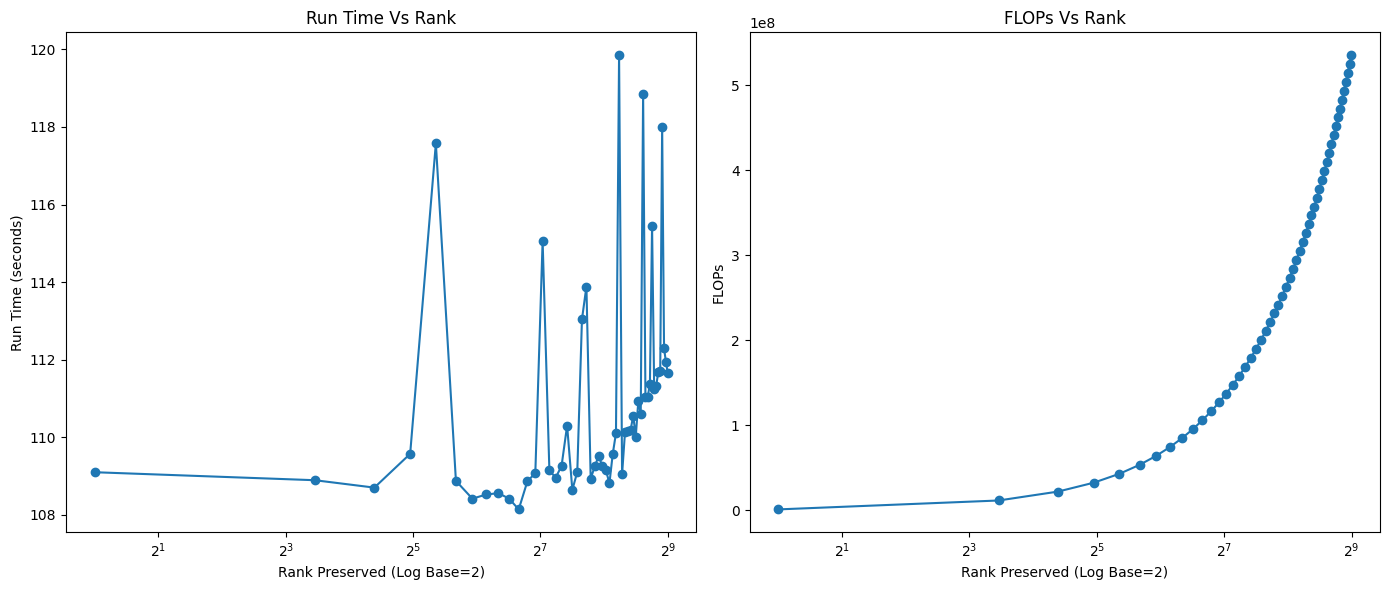

In [46]:
# Plotting flops and time
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(ranks, times, marker='o')
plt.title('Run Time Vs Rank')
plt.xlabel('Rank Preserved (Log Base=2)')
plt.xscale('log', base=2)
plt.ylabel('Run Time (seconds)')

plt.subplot(1, 2, 2)
plt.plot(ranks, flops, marker='o')
plt.title('FLOPs Vs Rank')
plt.xlabel('Rank Preserved (Log Base=2)')
plt.xscale('log', base=2)
plt.ylabel('FLOPs')

plt.tight_layout()
plt.show()

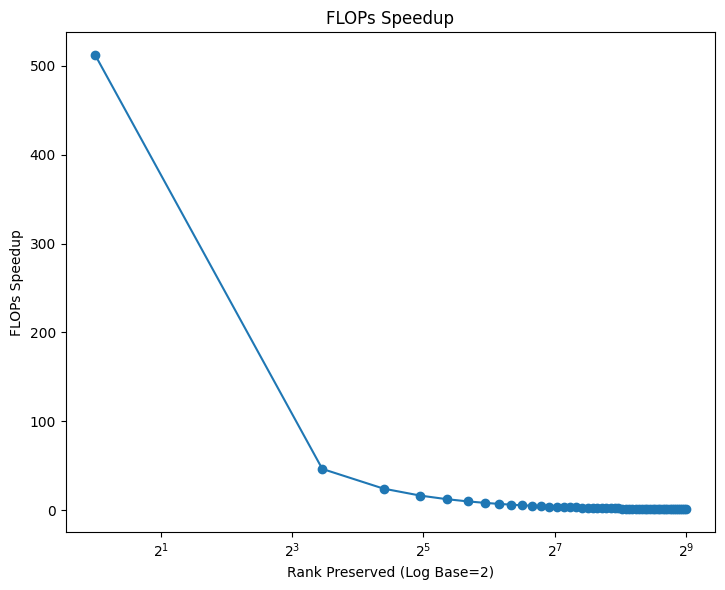

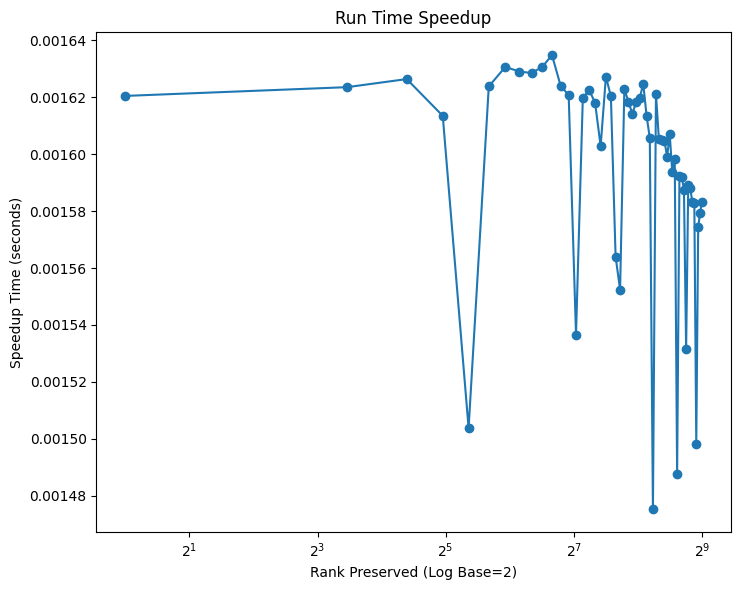

In [47]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(ranks, flops_speedup, marker='o')
plt.title('FLOPs Speedup')
plt.xlabel('Rank Preserved (Log Base=2)')
plt.xscale('log', base=2)
plt.ylabel('FLOPs Speedup')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(ranks, runtime_speedup, marker='o')
plt.title('Run Time Speedup')
plt.xlabel('Rank Preserved (Log Base=2)')
plt.xscale('log', base=2)
plt.ylabel('Speedup Time (seconds)')
plt.tight_layout()
plt.show()